# Dense report analysis (Nov'23)

In general, a "dense report" implies that an ISP is claiming more service locations than it actually provides sevice.  Several factors can contribute to these overestimations or overclaims of spatial coverage by ISPs.

One of the many ways to classify ISPs' reports is based on a methodology where the ISP follows the previous census block-wise approach from the 477 report. In this method, if they cover one location in a census block, they can claim the entire census block. However, the new BDC report requires reporting each individual BSL location.

In this notebook, we'll identify how many ISPs are still following the old 477-based reporting format.

In [1]:
#import dependency

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from census import Census
from us import states

import pyarrow as pa
import pyarrow.parquet as pq
import os
from shapely import Point, Polygon
import us
from us import states
import geopandas as gp
import pandas
import glob
import h3

import csv
import sys
import zipfile

# Merging NBM Submission

As a first step, we need to merge all the BDC submissions into a single file for computational benefits. We used the notebook 'merging_nbm_submissions_nov23.ipynb' for this task.

In [2]:
'''
# Step 1: This step will convert all raw nbm submission into single state wise submission (We can skip this step if already generated)


# Define the input and output directories
input_dir = "/home/playpen/data/nbm/20220630/20221212"
output_dir = "/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212"

# Define the FIPS codes for the states
fips_codes = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12",
              "13", "15", "16", "17", "18", "19", "20", "21", "22", "23",
              "24", "25", "26", "27", "28", "29", "30", "31", "32", "33",
              "34", "35", "37", "38", "39", "40", "41", "42", "44",
              "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", 
              "56", "60", "66","69", "72", "78"] #skip NY (36) as it's missing in input directory of 20221212, for other bdc file we need to consider NY (36)

for fips in fips_codes:
    # Create an empty list to hold the csv data for this state
    state_csv_data = []
    
    # Find all the zip files for this state
    zip_files = [file for file in os.listdir(input_dir) if file.startswith("bdc_" + fips) and file.endswith(".zip")]

    # Extract the csv data from each zip file
    for zip_file in zip_files:
        with zipfile.ZipFile(os.path.join(input_dir, zip_file), 'r') as z:
            # Each zip file should contain only one csv file, so get the first one
            csv_file_name = [name for name in z.namelist() if name.endswith('.csv')][0]
            with z.open(csv_file_name) as f:
                # Read the csv data into a pandas dataframe
                csv_data = pd.read_csv(f)
                # Add the csv data to the list
                state_csv_data.append(csv_data)

    # Concatenate all the csv data for this state into a single dataframe
    state_df = pd.concat(state_csv_data)

    # Convert the pandas dataframe to a PyArrow table
    table = pa.Table.from_pandas(state_df)

    # Define the output file name
    output_file_name = "bdc_" + fips + "_single_nbm.parquet"
    
    # Write the PyArrow table to a parquet file
    pq.write_table(table, os.path.join(output_dir, output_file_name))

'''

'\n# Step 1: This step will convert all raw nbm submission into single state wise submission (We can skip this step if already generated)\n\n\n# Define the input and output directories\ninput_dir = "/home/playpen/data/nbm/20220630/20221212"\noutput_dir = "/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212"\n\n# Define the FIPS codes for the states\nfips_codes = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12",\n              "13", "15", "16", "17", "18", "19", "20", "21", "22", "23",\n              "24", "25", "26", "27", "28", "29", "30", "31", "32", "33",\n              "34", "35", "37", "38", "39", "40", "41", "42", "44",\n              "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", \n              "56", "60", "66","69", "72", "78"] #skip NY (36) as it\'s missing in input directory of 20221212, for other bdc file we need to consider NY (36)\n\nfor fips in fips_codes:\n    # Create an empty list to hold the csv data for this state\n    state_

In [3]:
'''
# Filterout bad provider_id and modify the corresponding files (fillings 20221212)

# Bad provider_id: 10019402494, Unique States: ['MI']
# Bad provider_id: 10002934974, Unique States: ['OH']
# Bad provider_id: 10018608117, Unique States: ['UT']
# Bad provider_id: 10032812828, Unique States: ['WA']

# Directory path
directory_path = '/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212'

# List of bad provider_ids
bad_provider_ids = {
    'bdc_26_single_nbm.parquet': ['10019402494'],
    'bdc_39_single_nbm.parquet': ['10002934974'],
    'bdc_49_single_nbm.parquet': ['10018608117'],
    'bdc_53_single_nbm.parquet': ['10032812828']
}

# Process each file
for file_name, bad_ids in bad_provider_ids.items():
    file_path = os.path.join(directory_path, file_name)

    # Read Parquet file
    df = pd.read_parquet(file_path)

    # Convert 'provider_id' column to string
    df['provider_id'] = df['provider_id'].astype(str)

    # Filter out rows with bad provider_ids
    for bad_id in bad_ids:
        df = df[df['provider_id'] != bad_id]

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Save the modified DataFrame back to Parquet file
    pq.write_table(pa.Table.from_pandas(df), file_path)

    print(f"Processed {file_name}")

print("All files processed successfully.")

'''

'\n# Filterout bad provider_id and modify the corresponding files (fillings 20221212)\n\n# Bad provider_id: 10019402494, Unique States: [\'MI\']\n# Bad provider_id: 10002934974, Unique States: [\'OH\']\n# Bad provider_id: 10018608117, Unique States: [\'UT\']\n# Bad provider_id: 10032812828, Unique States: [\'WA\']\n\n# Directory path\ndirectory_path = \'/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212\'\n\n# List of bad provider_ids\nbad_provider_ids = {\n    \'bdc_26_single_nbm.parquet\': [\'10019402494\'],\n    \'bdc_39_single_nbm.parquet\': [\'10002934974\'],\n    \'bdc_49_single_nbm.parquet\': [\'10018608117\'],\n    \'bdc_53_single_nbm.parquet\': [\'10032812828\']\n}\n\n# Process each file\nfor file_name, bad_ids in bad_provider_ids.items():\n    file_path = os.path.join(directory_path, file_name)\n\n    # Read Parquet file\n    df = pd.read_parquet(file_path)\n\n    # Convert \'provider_id\' column to string\n    df[\'provider_id\'] = df[\'provider_id\'].astyp

In [4]:
'''

# Define the directory where the Parquet files are located
input_dir = '/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212'
output_dir = '/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212/us'

# Create a dictionary to map FIPS codes to state abbreviations
fips_to_state = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
    11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA',
    20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI',
    45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA',
    54: 'WV', 55: 'WI', 56: 'WY', 60: 'AS', 66: 'GU', 69: 'MP', 72: 'PR', 74: 'UM', 78: 'VI'
}

# Create an empty list to store dataframes
dfs = []

# List all Parquet files in the input directory
parquet_files = [f for f in os.listdir(input_dir) if f.endswith(".parquet")]

# Read, modify, and append each Parquet file
for file in parquet_files:
    # Extract the FIPS code from the filename
    fips_code = int(file.split('_')[1])
    
    # Read the Parquet file
    df = pd.read_parquet(os.path.join(input_dir, file))
    
    # Convert 'provider_id' column to string
    df['provider_id'] = df['provider_id'].astype(str)
    
    # Add a 'state' column based on the FIPS code
    df['state'] = fips_to_state.get(fips_code, 'Unknown')
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged dataframe as a Parquet file in the output directory
output_filename = 'bdc_usa_single_nbm_20220630_20221212.parquet'
output_path = os.path.join(output_dir, output_filename)
merged_df.to_parquet(output_path, index=False)

print(f'Merged file saved to {output_path}')

'''

'\n\n# Define the directory where the Parquet files are located\ninput_dir = \'/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212\'\noutput_dir = \'/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212/us\'\n\n# Create a dictionary to map FIPS codes to state abbreviations\nfips_to_state = {\n    1: \'AL\', 2: \'AK\', 4: \'AZ\', 5: \'AR\', 6: \'CA\', 8: \'CO\', 9: \'CT\', 10: \'DE\',\n    11: \'DC\', 12: \'FL\', 13: \'GA\', 15: \'HI\', 16: \'ID\', 17: \'IL\', 18: \'IN\', 19: \'IA\',\n    20: \'KS\', 21: \'KY\', 22: \'LA\', 23: \'ME\', 24: \'MD\', 25: \'MA\', 26: \'MI\', 27: \'MN\',\n    28: \'MS\', 29: \'MO\', 30: \'MT\', 31: \'NE\', 32: \'NV\', 33: \'NH\', 34: \'NJ\', 35: \'NM\',\n    37: \'NC\', 38: \'ND\', 39: \'OH\', 40: \'OK\', 41: \'OR\', 42: \'PA\', 44: \'RI\',\n    45: \'SC\', 46: \'SD\', 47: \'TN\', 48: \'TX\', 49: \'UT\', 50: \'VT\', 51: \'VA\', 53: \'WA\',\n    54: \'WV\', 55: \'WI\', 56: \'WY\', 60: \'AS\', 66: \'GU\', 69: \'MP\', 72: \'PR\',

In [5]:
# Now read the compiled NBM submission of 20221231_20231024

nbm = pandas.read_parquet('/home/tauhid/output/output_nbm/bdc_map_single_file/20220630/20221212/us/bdc_usa_single_nbm_20220630_20221212.parquet', engine='pyarrow')

print(nbm.nunique())
nbm.head()

provider_id                           2115
frn                                   2776
brand_name                            2830
location_id                      108829662
block_fips                         6164404
h3index_hex8                       3861599
technology_code                          8
max_advertised_download_speed          180
max_advertised_upload_speed            181
low_latency                              2
business_residential_code                3
state                                   55
dtype: int64


,provider_id,frn,brand_name,location_id,block_fips,h3index_hex8,technology_code,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state
0,130183,3474327,Sparklight,1037470487,10750302003064,88445a5457fffff,40,1000,50,1,X,AL
1,130183,3474327,Sparklight,1037470609,10750302004085,88445a54e3fffff,40,1000,50,1,X,AL
2,130183,3474327,Sparklight,1037472266,10750302003064,88445a5457fffff,40,1000,50,1,X,AL
3,130183,3474327,Sparklight,1037472903,10750302003064,88445a5457fffff,40,1000,50,1,X,AL
4,130183,3474327,Sparklight,1037473045,10750302004085,88445a54ebfffff,40,1000,50,1,X,AL


In [6]:
# rename the columns (make the headers more convinient to read)

nbm.rename(columns={
    'h3index_hex8': 'h3_8',
    'state':'state',
    'technology_code': 'technology',
    'block_fips': 'block_id',
    'max_advertised_download_speed': 'max_adv_dl',
    'max_advertised_upload_speed': 'max_adv_ul'
}, inplace=True)

# Add a new column 'nbm_publish_date' with the value '20221231_20231024'
nbm['nbm_publish_date'] = '20220630_20221212'

# Drop unnecessary columns
nbm = nbm[['provider_id', 'location_id', 'block_id', 'h3_8', 'state', 'technology', 'max_adv_dl', 'max_adv_ul', 'low_latency', 
                   'business_residential_code', 'nbm_publish_date']]

print(nbm.nunique())

nbm.head(4)

provider_id                       2115
location_id                  108829662
block_id                       6164404
h3_8                           3861599
state                               55
technology                           8
max_adv_dl                         180
max_adv_ul                         181
low_latency                          2
business_residential_code            3
nbm_publish_date                     1
dtype: int64


,provider_id,location_id,block_id,h3_8,state,technology,max_adv_dl,max_adv_ul,low_latency,business_residential_code,nbm_publish_date
0,130183,1037470487,10750302003064,88445a5457fffff,AL,40,1000,50,1,X,20220630_20221212
1,130183,1037470609,10750302004085,88445a54e3fffff,AL,40,1000,50,1,X,20220630_20221212
2,130183,1037472266,10750302003064,88445a5457fffff,AL,40,1000,50,1,X,20220630_20221212
3,130183,1037472903,10750302003064,88445a5457fffff,AL,40,1000,50,1,X,20220630_20221212


# Lets calculate locations in a census block

To identify which providers are sharing older Form 477-based reports (dense report) in BDC fillings, we need to calculate the total locations (BSL) within each census block and determine how many of these locations are covered by each specific provider among the total number.

*First, we need to calculate the provider-wise locations they claimed in each reported census block*

In [7]:
# Group by 'provider_id' and 'block_id' and then perform various aggregations
nbm_isp = nbm.groupby(['provider_id', 'block_id']).agg({
    'location_id': 'nunique',  # Count of unique location_id
    'h3_8': 'nunique',  # Count of unique h3_8
    'technology': lambda x: ','.join(x.unique().astype(str)),  # Convert to str before joining
    'state': lambda x: ','.join(x.unique()),  # List of unique state, comma-separated
    'nbm_publish_date': 'first'  # Add nbm_publish_date column
})

# Reset the index to make 'h3_8' a regular column
nbm_isp = nbm_isp.reset_index()

# Rename the columns as per your requirements
nbm_isp = nbm_isp.rename(columns={
    'location_id': 'location_counts',
    'h3_8': 'h3_8_counts',
    'technology': 'technology_list',
})

# Print the modified DataFrame
nbm_isp.head()

,provider_id,block_id,location_counts,h3_8_counts,technology_list,state,nbm_publish_date
0,130002,300010001001335,2,1,10,MT,20220630_20221212
1,130002,300010001002000,3,3,"10,50",MT,20220630_20221212
2,130002,300010001002004,1,1,10,MT,20220630_20221212
3,130002,300010001002012,1,1,50,MT,20220630_20221212
4,130002,300010001002025,1,1,50,MT,20220630_20221212


Maybe some columns are unnecessary for future analysis (e.g., max_adv_dl_min, max_adv_dl_mean, max_adv_dl_max, max_adv_ul_mean, max_adv_ul_max, max_adv_ul_min, low_latency_ratio). We can omit those in the future version of the code.

*Now similarly calculate the blockwise (any provider) total location counts*

In [8]:
# Group by 'block_id' and perform various aggregations
nbm_block = nbm.groupby('block_id').agg({
    'location_id': 'nunique',  # Count of unique location_id
    'provider_id': 'nunique', # Convert to str before joining
    'h3_8': 'nunique',  # Count of unique h3_8
    'technology': lambda x: ','.join(x.unique().astype(str)),  # Convert to str before joining
    'nbm_publish_date': 'first'  # Add nbm_publish_date column
})

# Reset the index to make 'h3_8' a regular column
nbm_block = nbm_block.reset_index()

# Rename the columns as per your requirements
nbm_block = nbm_block.rename(columns={
    'location_id': 'block_location_counts',
    'provider_id': 'block_provider_counts',
    'h3_8': 'block_h3_8_counts',
    'technology': 'block_technology_list',
    'nbm_publish_date': 'nbm_publish_date'
})

nbm_block = nbm_block[['block_id', 'block_provider_counts', 'block_location_counts','block_h3_8_counts', 
                   'block_technology_list', 'nbm_publish_date']]

nbm_block.head()

,block_id,block_provider_counts,block_location_counts,block_h3_8_counts,block_technology_list,nbm_publish_date
0,10010201001000,7,9,2,"40,10,60,71,61",20220630_20221212
1,10010201001001,7,20,2,"40,10,60,71,61",20220630_20221212
2,10010201001002,7,17,2,"40,10,50,60,71,61",20220630_20221212
3,10010201001003,7,12,2,"40,10,50,60,71,61",20220630_20221212
4,10010201001006,5,1,1,"10,60,71,61",20220630_20221212


In [9]:
print(nbm_block.nunique())

block_id                 6164404
block_provider_counts         19
block_location_counts        866
block_h3_8_counts             81
block_technology_list        237
nbm_publish_date               1
dtype: int64


In total, we have approximately 8.2 million census blocks across the U.S. Currently, we are working with around 6.2 million census blocks (excluding NY state for the 20220630_20221212 submissions, which contributes around 289K census blocks, and an additional 239K blocks are water-only). 

For further information, refer to: https://www.census.gov/geographies/reference-files/time-series/geo/tallies.html#entity_state_type

In future we need to perform another analysis to identify, why providers are not reporting on the remaining census blocks. The potential root causes include:

    1. No or low populations in those census blocks (we can verify this by checking population distributions).
    2. Providers don't offer services in those census blocks.


*Lets merge block location counts column in the nbm_isp dataframe*

In [10]:
# The merge the 'block_provider_counts' into the nbm_isp dataframe
nbm_isp = nbm_isp.merge(nbm_block[['block_id', 'block_location_counts']], on='block_id', how='left')

# Add comparison column (total loc in a block vs. loc covered by isp)

nbm_isp['pct_loc_covered'] = nbm_isp['location_counts'] / nbm_isp['block_location_counts']

# Rearrange columns

nbm_isp = nbm_isp[['provider_id', 'block_id', 'location_counts', 'block_location_counts', 'pct_loc_covered', 
                   'h3_8_counts', 'state', 'technology_list', 'nbm_publish_date']]

# Print headers of intermediate dataframe
print(nbm_isp.nunique())
nbm_isp.head()

provider_id                 2115
block_id                 6164404
location_counts             1020
block_location_counts        866
pct_loc_covered            30978
h3_8_counts                   83
state                         55
technology_list               62
nbm_publish_date               1
dtype: int64


,provider_id,block_id,location_counts,block_location_counts,pct_loc_covered,h3_8_counts,state,technology_list,nbm_publish_date
0,130002,300010001001335,2,6,0.333333,1,MT,10,20220630_20221212
1,130002,300010001002000,3,5,0.600000,3,MT,"10,50",20220630_20221212
2,130002,300010001002004,1,1,1.000000,1,MT,10,20220630_20221212
3,130002,300010001002012,1,1,1.000000,1,MT,50,20220630_20221212
4,130002,300010001002025,1,4,0.250000,1,MT,50,20220630_20221212


*Save intermediate dataframe (nbm_isp)*

In [2]:
# Write or read (if exists) the dataframe to a parquet file

parquet_file_path = '/home/tauhid/output/dense_report/intermediate_data/provider_wise_block_level_nbm_20220630_20221212.parquet'

if not os.path.exists(parquet_file_path):
    # Save the nbm_mod DataFrame as a Parquet file if it doesn't exist
    nbm_isp.to_parquet(parquet_file_path, engine='pyarrow')
else:
    # Read the existing Parquet file
    nbm_isp = pd.read_parquet(parquet_file_path, engine='pyarrow')

# Flagging Dense ISP

Lets check how many census block contains only one location (BSL)

In [10]:

# Filter rows with 'block_location_counts' equal to 1
blocks_one_loc = nbm_isp[nbm_isp['block_location_counts'].isin([1])]

# Drop duplicate entries of 'block_id' to count each unique 'block_id' only once
unique_blocks_one_loc = blocks_one_loc.drop_duplicates(subset='block_id')

# Group by 'state' and count the number of unique 'block_id' for block_location_counts == 1
block_counts_one_loc = unique_blocks_one_loc.groupby('state').size().reset_index(name='block_counts_one_location')

# Group by 'state' and count the total number of unique 'block_id'
block_counts_total = nbm_isp.groupby('state')['block_id'].nunique().reset_index(name='block_counts_total')

# Merge the two dataframes on 'state'
blocks = pd.merge(block_counts_one_loc, block_counts_total, on='state', how='outer')

# Add one new columns

blocks['pct_one_loc_blocks'] =  blocks['block_counts_one_location'] / blocks['block_counts_total']

# Display the result
blocks.head(10)


,state,block_counts_one_location,block_counts_total,pct_one_loc_blocks
0,AK,963,10655,0.090380
1,AL,16866,143499,0.117534
2,AR,11384,100703,0.113045
3,AS,30,333,0.090090
4,AZ,7996,113967,0.070161
5,CA,26363,406230,0.064897
6,CO,9729,110182,0.088299
7,CT,1884,43544,0.043267
8,DC,289,4656,0.062070
9,DE,1078,16269,0.066261


In [11]:
blocks.describe()

,block_counts_one_location,block_counts_total,pct_one_loc_blocks
count,55.000000,55.000000,55.000000
mean,10636.381818,112080.072727,0.099414
std,9288.799937,103975.205186,0.046859
min,30.000000,333.000000,0.039596
25%,3061.500000,37862.000000,0.069623
50%,9391.000000,97538.000000,0.090090
75%,16492.000000,145651.500000,0.118139
max,47674.000000,511651.000000,0.285630


It seems around 9% census blocks of each state having only one location. Lets visualize that information

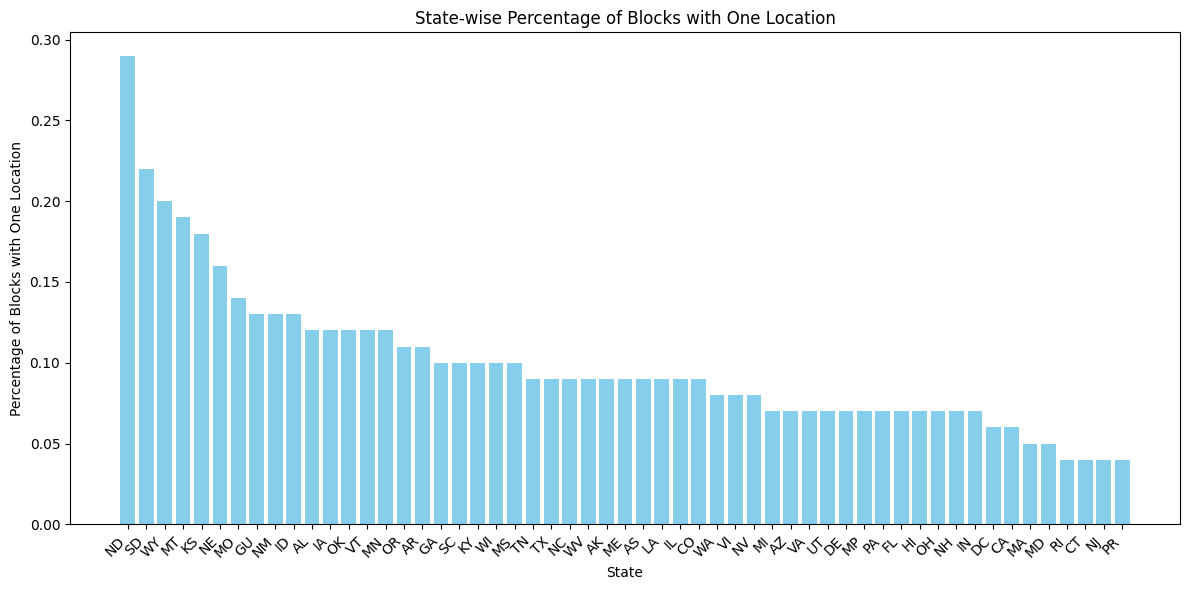

In [13]:
import matplotlib.pyplot as plt

# Assuming 'blocks' is your DataFrame with the calculated values
# Round 'pct_one_loc_blocks' to 2 decimal places
blocks['pct_one_loc_blocks'] = blocks['pct_one_loc_blocks'].round(2)

# Sort the DataFrame by 'pct_one_loc_blocks' in descending order
blocks_sorted = blocks.sort_values(by='pct_one_loc_blocks', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(blocks_sorted['state'], blocks_sorted['pct_one_loc_blocks'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage of Blocks with One Location')
plt.title('State-wise Percentage of Blocks with One Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Now, we'll flag providers who claimed coverage for all locations within the census blocks they asserted coverage for (no partial block coverage). We'll also exclude census blocks with only one location.

In [14]:
# Calculate the total number of blocks per provider_id, excluding rows where block_location_counts is 1
provider_block_counts = nbm_isp[nbm_isp['block_location_counts'] > 1].groupby('provider_id')['block_id'].sum()

# Calculate the total number of fully covered blocks per provider_id, excluding rows where block_location_counts is 1
fully_covered_blocks = nbm_isp[(nbm_isp['pct_loc_covered'] == 1) & (nbm_isp['block_location_counts'] > 1)].groupby('provider_id')['block_id'].sum()

# Calculate the percentage of fully covered blocks
pct_full_block_coverage = (fully_covered_blocks / provider_block_counts)

# Merge the percentage back into the DataFrame
nbm_isp = nbm_isp.merge(pct_full_block_coverage, left_on='provider_id', right_index=True, suffixes=('', '_pct_full_block_coverage'))

# Rename the new column
nbm_isp.rename(columns={'block_id_pct_full_block_coverage': 'pct_full_block_coverage'}, inplace=True)

# Print the modified DataFrame
print(nbm_isp.shape)
print(nbm_isp.nunique())
nbm_isp.head()

(41765696, 10)
provider_id                   2113
block_id                   6164404
location_counts               1020
block_location_counts          866
pct_loc_covered              30978
h3_8_counts                     83
state                           55
technology_list                 62
nbm_publish_date                 1
pct_full_block_coverage       1914
dtype: int64


,provider_id,block_id,location_counts,block_location_counts,pct_loc_covered,h3_8_counts,state,technology_list,nbm_publish_date,pct_full_block_coverage
0,130002,300010001001335,2,6,0.333333,1,MT,10,20220630_20221212,0.788475
1,130002,300010001002000,3,5,0.600000,3,MT,"10,50",20220630_20221212,0.788475
2,130002,300010001002004,1,1,1.000000,1,MT,10,20220630_20221212,0.788475
3,130002,300010001002012,1,1,1.000000,1,MT,50,20220630_20221212,0.788475
4,130002,300010001002025,1,4,0.250000,1,MT,50,20220630_20221212,0.788475


In [16]:
nbm_isp_flat = nbm_isp.groupby('provider_id').agg({
    'block_id': 'nunique',  # Count of unique block_id
    'pct_loc_covered': ['min', 'median', 'max'],  # Min, mean, and max of max_adv_dl
    'technology_list': lambda x: ','.join(x.unique()),  # List of unique technology, comma-separated
    'state': lambda x: ','.join(x.unique()), # Add state columns
    'pct_full_block_coverage' : 'median', # Add full block coverage
    'nbm_publish_date': 'first'  # Add nbm_publish_date column
})

# Flatten the multi-index columns
nbm_isp_flat.columns = ['_'.join(col).strip() for col in nbm_isp_flat.columns.values]

# Reset the index to make 'provider_id' a regular column
nbm_isp_flat = nbm_isp_flat.reset_index()

# Rename the columns as per your requirements
nbm_isp_flat = nbm_isp_flat.rename(columns={
    'block_id_nunique': 'block_counts',
    'pct_loc_covered_min': 'pct_loc_covered_min',
    'pct_loc_covered_median': 'pct_loc_covered_median',
    'pct_loc_covered_max': 'pct_loc_covered_max',
    'pct_full_block_coverage_median': 'pct_full_block_coverage',
    'state_<lambda>': 'state',
    'technology_list_<lambda>': 'technology',
    'nbm_publish_date_first': 'nbm_publish_date'
    })

# Remove duplicates and keep only unique technologies
nbm_isp_flat['technology'] = nbm_isp_flat['technology'].apply(lambda x: ','.join(sorted(set(x.split(',')))))

# Rearrange the columns

nbm_isp_flat = nbm_isp_flat[['provider_id','technology', 'block_counts', 'state', 'pct_loc_covered_min', 'pct_loc_covered_median',
                              'pct_loc_covered_max', 'pct_full_block_coverage', 'nbm_publish_date']]

# Print the modified DataFrame
nbm_isp_flat.head()

,provider_id,technology,block_counts,state,pct_loc_covered_min,pct_loc_covered_median,pct_loc_covered_max,pct_full_block_coverage,nbm_publish_date
0,130002,"10,50",3491,MT,0.043478,1.000000,1.0,0.788475,20220630_20221212
1,130008,"10,50,70,71",4271,"IA,MI,MN",0.008547,1.000000,1.0,0.577488,20220630_20221212
2,130012,50,3024,"IL,MO",0.010638,1.000000,1.0,0.791039,20220630_20221212
3,130017,"10,50",29,CO,0.021277,1.000000,1.0,0.500000,20220630_20221212
4,130018,"10,50",628,MI,0.005747,0.785714,1.0,0.269368,20220630_20221212


In [17]:
# Print the modified DataFrame
print(nbm_isp_flat.nunique())
print(nbm_isp_flat.shape)

provider_id                2113
technology                   37
block_counts               1421
state                       305
pct_loc_covered_min         565
pct_loc_covered_median      364
pct_loc_covered_max          28
pct_full_block_coverage    1914
nbm_publish_date              1
dtype: int64
(2113, 9)


providers that have covered all locations within the census blocks they serve but have not covered any locations in adjacent census blocks

In [18]:
# First filter to create isp_flag_d with 'pct_full_block_coverage' equal to 1
isp_flag_d = nbm_isp_flat[nbm_isp_flat['pct_full_block_coverage'] == 1]

# Second filter to exclude rows with 'technology' equal to 60 or 61 from isp_flag_d
isp_flag_d = isp_flag_d[~isp_flag_d['technology'].str.strip().isin(['60'])] # we're filtering out satellite service provider.

# Reset the index of the DataFrame
isp_flag_d.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(isp_flag_d.nunique())
print(isp_flag_d.shape)
isp_flag_d.head()

provider_id                22
technology                  8
block_counts               22
state                      21
pct_loc_covered_min         1
pct_loc_covered_median      1
pct_loc_covered_max         1
pct_full_block_coverage     1
nbm_publish_date            1
dtype: int64
(22, 9)


,provider_id,technology,block_counts,state,pct_loc_covered_min,pct_loc_covered_median,pct_loc_covered_max,pct_full_block_coverage,nbm_publish_date
0,130178,50,23,VA,1.0,1.0,1.0,1.0,20220630_20221212
1,130500,"50,70,71",5347,"ID,WA",1.0,1.0,1.0,1.0,20220630_20221212
2,131261,70,2,IL,1.0,1.0,1.0,1.0,20220630_20221212
3,200041,10,6497,CA,1.0,1.0,1.0,1.0,20220630_20221212
4,240012,"40,50",346,OH,1.0,1.0,1.0,1.0,20220630_20221212


# Visualization of Dense Flagged Provider

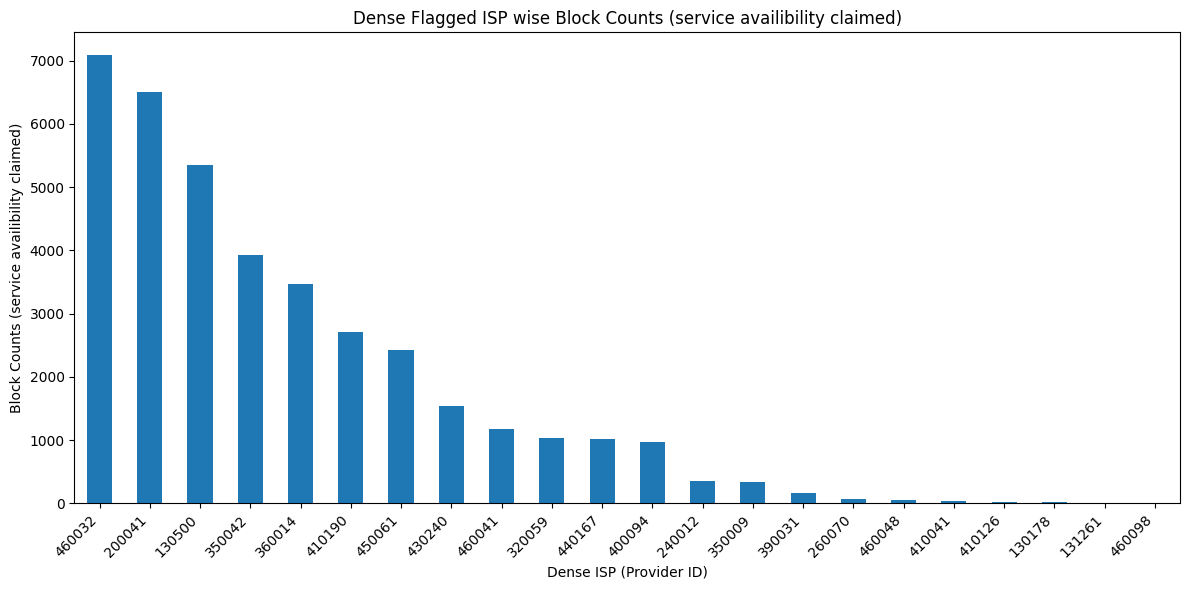

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'provider_id'
grouped_data = isp_flag_d.groupby('provider_id')

# Step 2: Take the first row of each group to get unique provider_id wise block_counts
unique_block_counts = grouped_data['block_counts'].first()

# Step 3: Sort the 'summed_successful_challenges' series in descending order
sorted_unique_block_counts = unique_block_counts.sort_values(ascending=False)

# Step 4: Plot the bar chart for each 'provider_id'
sorted_unique_block_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Dense Flagged ISP wise Block Counts (service availibility claimed)')
plt.xlabel('Dense ISP (Provider ID)')
plt.ylabel('Block Counts (service availibility claimed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()